<a href="https://colab.research.google.com/github/Animesh-roy100/Text-Prediction-Using-LSTM/blob/main/Text_Prediction_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import random
import sys

In [ ]:
#Load TEXT
#Save notepad as UTF-8 (Select from dropdown during saving)
filename = "/content/the_jungle_book.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
#Print first 1000 words
print(raw_text[0:1000])

the jungle book

by rudyard kipling



contents

     mowgli’s brothers
     hunting-song of the seeonee pack
     kaa’s hunting
     road-song of the bandar-log
     “tiger! tiger!”
      mowgli’s song
     the white seal
     lukannon
     “rikki-tikki-tavi”
      darzee’s chant
     toomai of the elephants
     shiv and the grasshopper
     her majesty’s servants
     parade song of the camp animals




mowgli’s brothers

     now rann the kite brings home the night
        that mang the bat sets free--
     the herds are shut in byre and hut
        for loosed till dawn are we.
     this is the hour of pride and power,
        talon and tush and claw.
     oh, hear the call!--good hunting all
        that keep the jungle law!
     night-song in the jungle

it was seven o’clock of a very warm evening in the seeonee hills when
father wolf woke up from his day’s rest, scratched himself, yawned, and
spread out his paws one after the other to get rid of the sleepy feeling
in their tips.

In [ ]:
#Clean text
#Remove numbers
raw_text = ''.join(c for c in raw_text if not c.isdigit())

In [ ]:
#How many total characters do we have in our training text?
chars = sorted(list(set(raw_text))) #List of every character
print(chars)

['\n', ' ', '!', '$', '%', '(', ')', '*', ',', '-', '.', '/', ':', ';', '?', '@', '[', ']', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '‘', '’', '“', '”']


In [ ]:
#Character sequences must be encoded as integers.
#Each unique character will be assigned an integer value.
#Create a dictionary of characters mapped to integer values.
char_to_int = dict((c, i) for i, c in enumerate(chars))
print(char_to_int)

{'\n': 0, ' ': 1, '!': 2, '$': 3, '%': 4, '(': 5, ')': 6, '*': 7, ',': 8, '-': 9, '.': 10, '/': 11, ':': 12, ';': 13, '?': 14, '@': 15, '[': 16, ']': 17, '`': 18, 'a': 19, 'b': 20, 'c': 21, 'd': 22, 'e': 23, 'f': 24, 'g': 25, 'h': 26, 'i': 27, 'j': 28, 'k': 29, 'l': 30, 'm': 31, 'n': 32, 'o': 33, 'p': 34, 'q': 35, 'r': 36, 's': 37, 't': 38, 'u': 39, 'v': 40, 'w': 41, 'x': 42, 'y': 43, 'z': 44, '‘': 45, '’': 46, '“': 47, '”': 48}


In [ ]:
#Do the reverse so we can print our predictions in characters and not interges
int_to_char = dict((i, c) for i, c in enumerate(chars))
print(int_to_char)

{0: '\n', 1: ' ', 2: '!', 3: '$', 4: '%', 5: '(', 6: ')', 7: '*', 8: ',', 9: '-', 10: '.', 11: '/', 12: ':', 13: ';', 14: '?', 15: '@', 16: '[', 17: ']', 18: '`', 19: 'a', 20: 'b', 21: 'c', 22: 'd', 23: 'e', 24: 'f', 25: 'g', 26: 'h', 27: 'i', 28: 'j', 29: 'k', 30: 'l', 31: 'm', 32: 'n', 33: 'o', 34: 'p', 35: 'q', 36: 'r', 37: 's', 38: 't', 39: 'u', 40: 'v', 41: 'w', 42: 'x', 43: 'y', 44: 'z', 45: '‘', 46: '’', 47: '“', 48: '”'}


In [ ]:
#summarize the data
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters in the text; corpus length: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters in the text; corpus length:  292267
Total Vocab:  49


In [ ]:
seq_length = 60 
step = 10 
sentences = [] 
next_chars = []
for i in range(0, n_chars - seq_length, step):
  sentences.append(raw_text[i: i+seq_length])
  next_chars.append(raw_text[i + seq_length])
n_patterns = len(sentences)
print('Number of sequences:', n_patterns)


Number of sequences: 29221


In [ ]:
#Vectorization
x = np.zeros((len(sentences), seq_length, n_vocab), dtype=np.bool)
y = np.zeros((len(sentences), n_vocab), dtype=np.bool)
for i, sentence in enumerate(sentences):
  for t, char in enumerate(sentence):
    x[i, t, char_to_int[char]] = 1
  y[i, char_to_int[next_chars[i]]] = 1

print(x.shape)
print(y.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


(29221, 60, 49)
(29221, 49)


In [ ]:
print(y[0:10])

[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False  True False
  False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False  True False False False False False False False False False False
  False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False  True False False False False False False False False False
  False]
 [False False False False False False False False False False False False
  False Fal

In [ ]:
#Build the model: a single LSTM
model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, n_vocab)))
model.add(Dense(n_vocab, activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               91136     
                                                                 
 dense (Dense)               (None, 49)                6321      
                                                                 
Total params: 97,457
Trainable params: 97,457
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
#Define the checkpoint
filepath="saved_weights/saved_weights-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]

In [ ]:
#Fit the model
history = model.fit(x, y, batch_size=128, epochs=50, callbacks=callbacks_list)
model.save('my_saved_weights_jungle_book_50epochs.h5')

Epoch 1/50
229/229 [==============================] - ETA: 0s - loss: 2.5084
Epoch 1: loss improved from inf to 2.50838, saving model to saved_weights/saved_weights-01-2.5084.hdf5
229/229 [==============================] - 49s 203ms/step - loss: 2.5084
Epoch 2/50
229/229 [==============================] - ETA: 0s - loss: 2.0377
Epoch 2: loss improved from 2.50838 to 2.03775, saving model to saved_weights/saved_weights-02-2.0377.hdf5
229/229 [==============================] - 62s 269ms/step - loss: 2.0377
Epoch 3/50
229/229 [==============================] - ETA: 0s - loss: 1.8572
Epoch 3: loss improved from 2.03775 to 1.85722, saving model to saved_weights/saved_weights-03-1.8572.hdf5
229/229 [==============================] - 52s 226ms/step - loss: 1.8572
Epoch 4/50
229/229 [==============================] - ETA: 0s - loss: 1.7104
Epoch 4: loss improved from 1.85722 to 1.71036, saving model to saved_weights/saved_weights-04-1.7104.hdf5
229/229 [==============================] - 39s 17

In [ ]:
from matplotlib import pyplot as plt

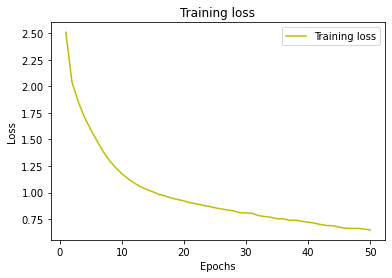

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
def sample(preds):
  preds = np.asarray(preds).astype('float64')
  preds = np.log(preds)
  exp_preds = np.exp(preds)
  preds = exp_preds / np.sum(exp_preds)
  probas = np.random.multinomial(1, preds, 1)
  return np.argmax(probas)

In [ ]:
#Prediction
# load the network weights
filename = "my_saved_weights_jungle_book_50epochs.h5"
model.load_weights(filename)

In [ ]:
start_index = random.randint(0, n_chars - seq_length -1)

In [ ]:
#Initiate generated text and keep adding new predictions and print them out
generated = ''
sentence = raw_text[start_index: start_index + seq_length]
generated += sentence

print('----- Seed for our text prediction: "' + sentence + '"')

----- Seed for our text prediction: "al makes a
slow mongoose, and if he wanted all his strength "


In [ ]:
for i in range(400):   # Number of characters including spaces
    x_pred = np.zeros((1, seq_length, n_vocab))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_to_int[char]] = 1.

    preds = model.predict(x_pred, verbose=0)[0]
    next_index = sample(preds)
    next_char = int_to_char[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()
print()

e villager folvound to the great shemplying see his upfralm no, regs following; and thood and the
for may and saw unces, looked in the madry of the onwa’s of the
feet even shopes in his time with themorme they call, in and coulder
for muft hear by parght ug . they i stook of the
project gutenberg-tm wothents his mother seeld”s,
     as they.”

ake any old you read, with the dory makk flow foot

ye
